In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
forestfires = pd.read_csv(r'C:\Users\DELL\Downloads\forestfires.csv')
forestfires.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### EDA

In [7]:
forestfires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:

forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:

# Dummy variables are already created so we will remove month and day columns :
forestfires.drop(["month","day"], axis=1, inplace=True)

<Axes: >

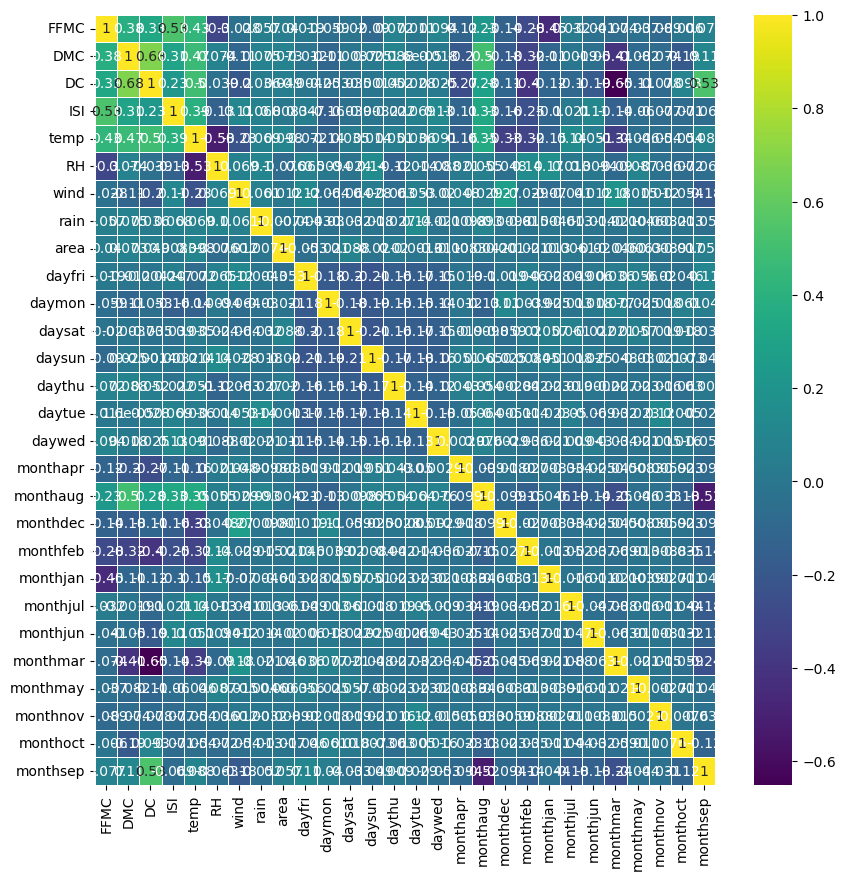

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(forestfires.corr(numeric_only=True),annot=True,cmap='viridis',linewidths=.5)

In [12]:
# Finding Categorical Data :
print("The FFMC column")
print(forestfires['FFMC'].value_counts())
print()
print("The DMC column")
print(forestfires['DMC'].value_counts())
print()
print("The DC column")
print(forestfires['DC'].value_counts())
print()
print("The ISI column")
print(forestfires['ISI'].value_counts())
print()
print("The TEMP column")
print(forestfires['temp'].value_counts())
print()
print("The RH column")
print(forestfires['RH'].value_counts())
print()
print("The WIND column")
print(forestfires['wind'].value_counts())
print()
print("The RAIN column")
print(forestfires['rain'].value_counts())
print()
print("The AREA column")
print(forestfires['area'].value_counts())
print()
print("The SIZE-CATEGORY column")
print(forestfires['size_category'].value_counts())
print()

The FFMC column
FFMC
92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: count, Length: 106, dtype: int64

The DMC column
DMC
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: count, Length: 215, dtype: int64

The DC column
DC
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: count, Length: 219, dtype: int64

The ISI column
ISI
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: count, Length: 119, dtype: int64

The TEMP column
temp
17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: count, Length: 192, dtype: int64

The RH column
RH
27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     

In [13]:
size_category_map = {"small":0, "large":1}
forestfires["size_category"] = forestfires["size_category"].map(size_category_map)
forestfires.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:

forestfires["size_category"].value_counts()

size_category
0    378
1    139
Name: count, dtype: int64

In [15]:

forestfires.shape

(517, 29)

In [16]:


# Defining Predictors and Target Variables :
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [17]:
# Splitting data into Train and Test Data Set :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.3,stratify=target)

In [18]:
# Model Building :
def prep_model(hidden_dim):
    model = Sequential()
    
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else :
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

    return model

In [19]:
first_model = prep_model([28,50,40,20,1])
history = first_model.fit(np.array(x_train),np.array(y_train),epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 1.0281 - accuracy: 0.6648
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6676
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7147
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7008
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7895
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8061
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7535
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7784
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8144
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.8089
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9695
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9169
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9806
Epoch 86/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9668
Epoch 87/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9584
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9474
Epoch 89/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9668
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9557
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9418
Epoch 92/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9612
Epoch 93/500


12/12 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9751
Epoch 165/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9695
Epoch 166/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9640
Epoch 167/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9889
Epoch 168/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9557
Epoch 169/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9806
Epoch 170/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9612
Epoch 171/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9778
Epoch 172/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9640
Epoch 173/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9695
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9834
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9778
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9640
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9723
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9778
Epoch 250/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9584
Epoch 251/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9778
Epoch 252/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9861
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9751
Epoch 254/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9612
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9640
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9834
Epoch 328/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9806
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9751
Epoch 330/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9778
Epoch 331/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9806
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9640
Epoch 333/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9861
Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9723
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9751
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9778
Epoch 408/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9889
Epoch 409/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9695
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9917
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9778
Epoch 412/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9917
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9806
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9889
Epoch 416/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9723
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9778
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9917
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9945
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9695
Epoch 492/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9889
Epoch 493/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9834
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9806
Epoch 495/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9834
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9889
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9861
Epoc

In [20]:
pred_train = first_model.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

12/12 [==============================] - 0s 1ms/step


0      1.701669e-06
1      8.504895e-08
2      1.013648e-07
3      1.000000e+00
4      5.142824e-06
           ...     
356    1.802911e-05
357    1.000000e+00
358    1.014318e-10
359    1.000000e+00
360    1.134312e-04
Length: 361, dtype: float32

In [21]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"
pred_train_class

0      small
1      small
2      small
3      large
4      small
       ...  
356    small
357    large
358    small
359    large
360    small
Length: 361, dtype: object

In [22]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()


size_category
0    264
1     97
Name: count, dtype: int64

In [23]:
#For training data
from sklearn.metrics import confusion_matrix

train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()

confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,97,29
small,0,235


In [24]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"

test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"
test["original_class"].value_counts()

np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True))
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

5/5 [==============================] - 0s 1ms/step


original_class,large,small
row_0,,
large,41,3
small,1,111


In [25]:
# evaluate the model
scores = first_model.evaluate(predictors, target)
print("%s: %.2f%%" % (first_model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9362
accuracy: 93.62%
